In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math


import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as tick

import plotly.graph_objects as go
import plotly.express as px

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

plt.rcParams.update({'font.size': 16})

### Obs.: Plotly doesn't open in Github. Please download notebook to use.

In [2]:
pd.set_option("display.precision", 5)
pd.set_option('display.max_rows', 15)

In [3]:
pd.options.display.float_format = '{:.4f}'.format

In [4]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

In [5]:
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df['location'] = df['location'].replace(['United States'],'United_States')
df['location'] = df['location'].replace(['United Kingdom'],'United_Kingdom')
df

iso_code continent       location       date  total_cases  new_cases  \
0          AFG      Asia    Afghanistan 2019-12-31       0.0000     0.0000   
1          AFG      Asia    Afghanistan 2020-01-01       0.0000     0.0000   
2          AFG      Asia    Afghanistan 2020-01-02       0.0000     0.0000   
3          AFG      Asia    Afghanistan 2020-01-03       0.0000     0.0000   
4          AFG      Asia    Afghanistan 2020-01-04       0.0000     0.0000   
...        ...       ...            ...        ...          ...        ...   
34238      NaN       NaN  International 2020-02-28     705.0000     0.0000   
34239      NaN       NaN  International 2020-02-29     705.0000     0.0000   
34240      NaN       NaN  International 2020-03-01     705.0000     0.0000   
34241      NaN       NaN  International 2020-03-02     705.0000     0.0000   
34242      NaN       NaN  International 2020-03-10     696.0000    -9.0000   

       total_deaths  new_deaths  total_cases_per_million  \
0            0.0000      0.0000                   0.0000   
1            0.0000      0.0000                   0.0000   
2            0.0000      0.0000                   0.0000   
3            0.0000      0.0000                   0.0000   
4            0.0000      0.0000                   0.0000   
...             ...         ...                      ...   
34238        4.0000      0.0000                      nan   
34239        6.0000      2.0000                      nan   
34240        6.0000      0.0000                      nan   
34241        6.0000      0.0000                      nan   
34242        7.0000      1.0000                      nan   

       new_cases_per_million  ...  aged_70_older  gdp_per_capita  \
0                     0.0000  ...         1.3370       1803.9870   
1                     0.0000  ...         1.3370       1803.9870   
2                     0.0000  ...         1.3370       1803.9870   
3                     0.0000  ...         1.3370       1803.9870   
4                     0.0000  ...         1.3370       1803.9870   
...                      ...  ...            ...             ...   
34238                    nan  ...            nan             nan   
34239                    nan  ...            nan             nan   
34240                    nan  ...            nan             nan   
34241                    nan  ...            nan             nan   
34242                    nan  ...            nan             nan   

       extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0                  nan               597.0290               9.5900   
1                  nan               597.0290               9.5900   
2                  nan               597.0290               9.5900   
3                  nan               597.0290               9.5900   
4                  nan               597.0290               9.5900   
...                ...                    ...                  ...   
34238              nan                    nan                  nan   
34239              nan                    nan                  nan   
34240              nan                    nan                  nan   
34241              nan                    nan                  nan   
34242              nan                    nan                  nan   

       female_smokers  male_smokers  handwashing_facilities  \
0                 nan           nan                 37.7460   
1                 nan           nan                 37.7460   
2                 nan           nan                 37.7460   
3                 nan           nan                 37.7460   
4                 nan           nan                 37.7460   
...               ...           ...                     ...   
34238             nan           nan                     nan   
34239             nan           nan                     nan   
34240             nan           nan                     nan   
34241             nan           nan                     nan 

### Analysis of the last N days

In [6]:
Ndays = '150days'

In [7]:
df = df.loc[:,['date', 'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
df = df[df['date'] > pd.to_datetime("today") - pd.to_timedelta(Ndays)]
df = df.sort_values(by=['total_cases'], ascending=True)
df

date              location  total_cases  total_deaths  new_cases  \
21514 2020-03-17               Myanmar       0.0000        0.0000     0.0000   
11525 2020-03-22                Gambia       1.0000        0.0000     0.0000   
13130 2020-03-21              Guernsey       1.0000        0.0000     0.0000   
13129 2020-03-20              Guernsey       1.0000        0.0000     1.0000   
24238 2020-03-08              Paraguay       1.0000        0.0000     1.0000   
...          ...                   ...          ...           ...        ...   
30939 2020-03-14                  Togo          nan           nan        nan   
31987 2020-03-07  United Arab Emirates          nan           nan        nan   
31989 2020-03-09  United Arab Emirates          nan           nan        nan   
31992 2020-03-12  United Arab Emirates          nan           nan        nan   
31994 2020-03-14  United Arab Emirates          nan           nan        nan   

       new_deaths  
21514      0.0000  
11525      0.0000  
13130      0.0000  
13129      0.0000  
24238      0.0000  
...           ...  
30939         nan  
31987         nan  
31989         nan  
31992         nan  
31994         nan  

[29545 rows x 6 columns]

# 1. Number of cases and deaths in World

In [8]:
dfWorld = df[df['location'] == 'World']
dfWorld = dfWorld.sort_values(by='date', ascending=True)
dfWorld = dfWorld.loc[:,['date', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
dfWorld.reset_index(drop=True, inplace=True)
dfWorld

date   total_cases  total_deaths   new_cases  new_deaths
0   2020-03-07   102842.0000     3488.0000   4137.0000    104.0000
1   2020-03-08   106812.0000     3585.0000   3970.0000     97.0000
2   2020-03-09   110984.0000     3813.0000   4172.0000    228.0000
3   2020-03-10   115746.0000     4021.0000   4762.0000    208.0000
4   2020-03-11   120832.0000     4294.0000   5086.0000    273.0000
..         ...           ...           ...         ...         ...
144 2020-07-29 16713047.0000   660143.0000 243602.0000   6260.0000
145 2020-07-30 17011169.0000   666862.0000 298122.0000   6719.0000
146 2020-07-31 17301496.0000   673293.0000 290327.0000   6431.0000
147 2020-08-01 17579842.0000   679502.0000 278346.0000   6209.0000
148 2020-08-02 17841669.0000   685281.0000 261827.0000   5779.0000

[149 rows x 5 columns]

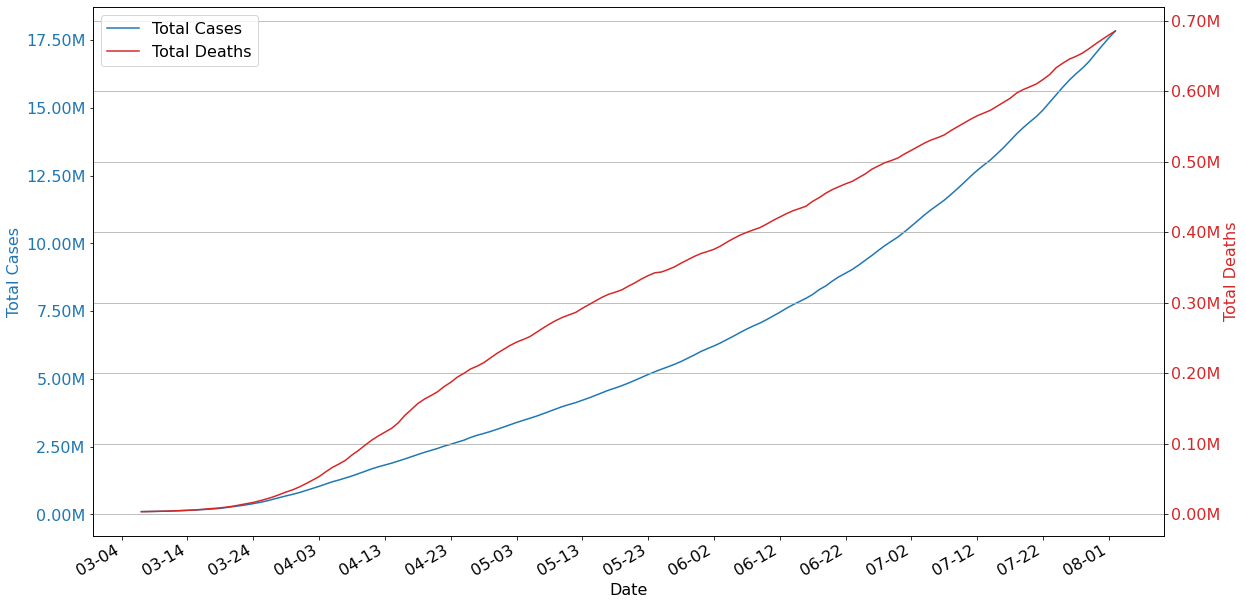

In [80]:
fig, ax1 = plt.subplots(figsize=(19.20,10.80))

color = 'tab:blue'
ax1.plot(dfWorld.date, dfWorld.total_cases, color=color, label='Total Cases')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Cases', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ticklabel_format(style='plain', axis='y')

ax2 = ax1.twinx()

color = 'tab:red'
ax2.plot(dfWorld.date, dfWorld.total_deaths, color=color, label = 'Total Deaths')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Deaths', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
plt.gcf().autofmt_xdate()

fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

plt.grid()
plt.show()

### New deaths per day

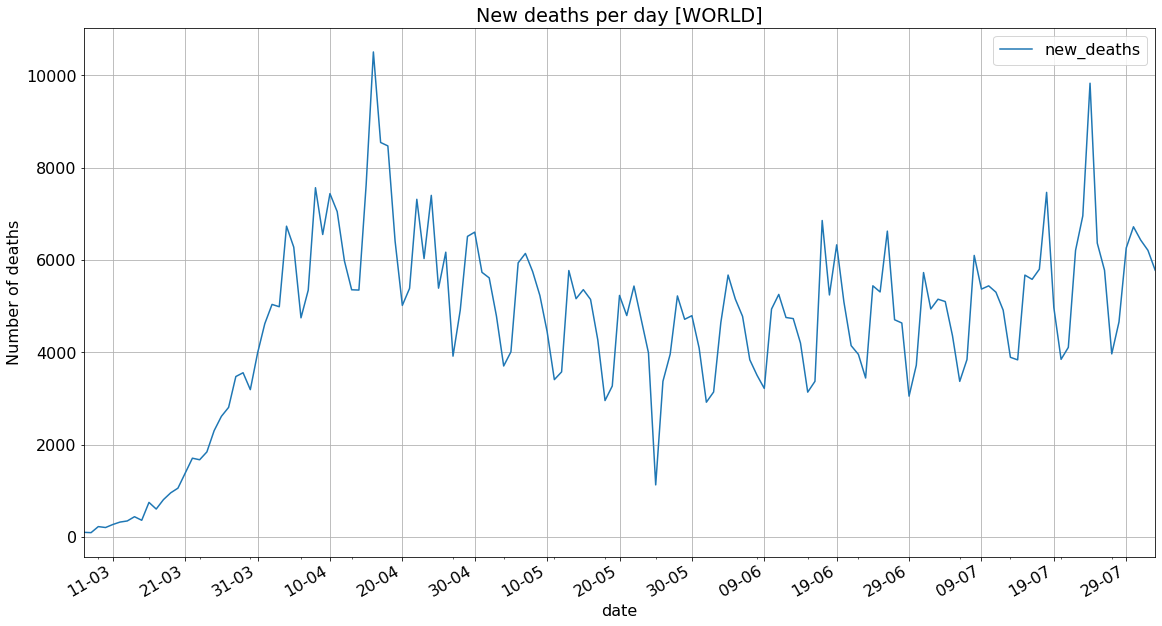

In [11]:
dfWorld.plot(x='date', y='new_deaths', figsize=(19.20,10.80))

plt.ylabel('Number of deaths')
plt.title('New deaths per day [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### New cases per day

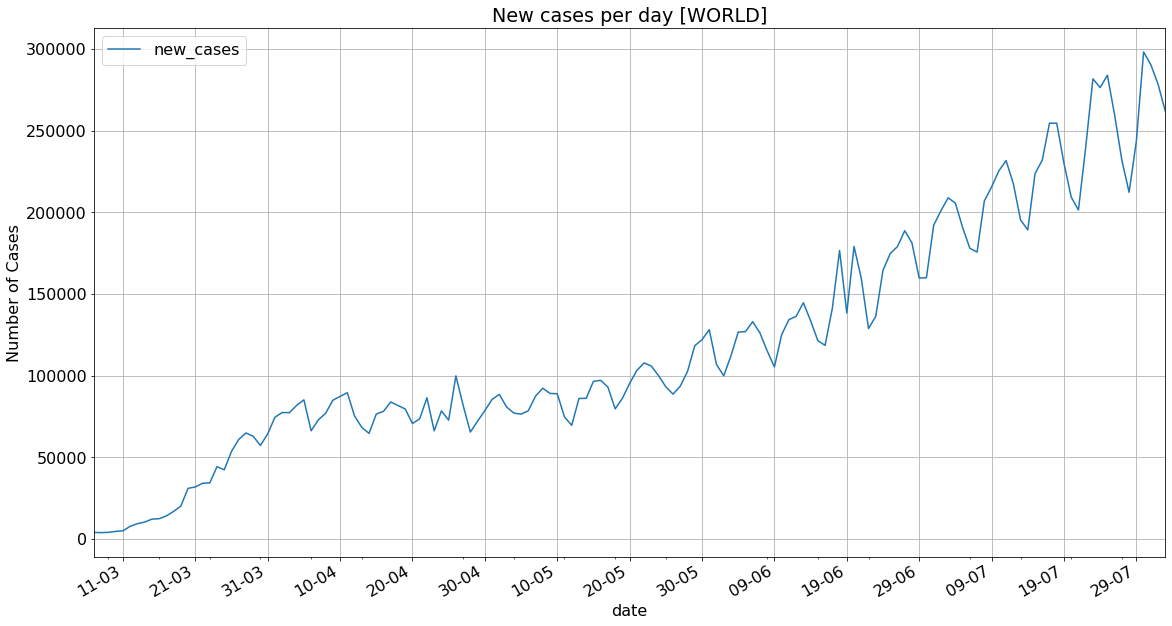

In [12]:
dfWorld.plot(x='date', y='new_cases', figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('New cases per day [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

# 2. Selecting Countries by the following conditions: 50k total cases and 35k deaths.

In [13]:
myDate = df['date'].astype(str).unique()

In [14]:
mainCountries = df[
        (df['total_cases'] > 50000) & 
        (df['total_deaths'] > 35000) &
        (df['location'] != 'World') &
        (df['location'] != 'International')
]
mainCountries = mainCountries.sort_values(by=['total_cases'], ascending=False)
mainCountries

date        location  total_cases  total_deaths  new_cases  \
32567 2020-08-02   United_States 4620444.0000   154447.0000 58407.0000   
32566 2020-08-01   United_States 4562037.0000   153314.0000 67023.0000   
32565 2020-07-31   United_States 4495014.0000   152070.0000 68032.0000   
32564 2020-07-30   United_States 4426982.0000   150713.0000 74985.0000   
32563 2020-07-29   United_States 4351997.0000   149256.0000 61734.0000   
...          ...             ...          ...           ...        ...   
32281 2020-05-24  United_Kingdom  243081.0000    36734.0000  2062.0000   
32280 2020-05-23  United_Kingdom  241019.0000    36451.0000  2574.0000   
32279 2020-05-22  United_Kingdom  238445.0000    36093.0000  2718.0000   
32278 2020-05-21  United_Kingdom  235727.0000    35755.0000  3052.0000   
32277 2020-05-20  United_Kingdom  232675.0000    35386.0000  2589.0000   

       new_deaths  
32567   1133.0000  
32566   1244.0000  
32565   1357.0000  
32564   1457.0000  
32563   1245.0000  
...           ...  
32281    283.0000  
32280    358.0000  
32279    338.0000  
32278    369.0000  
32277    548.0000  

[281 rows x 6 columns]

In [15]:
dfCountry = mainCountries['location'].astype(str).unique()

In [16]:
d = {}
for index in range(len(dfCountry)):
    d[index] = df[df['location'] == dfCountry[index]]
    d[index].reset_index(drop=True, inplace=True)

## Total cases in the main countries

In [17]:
totalCases_list=[]
totalDeaths_list=[]
newCases_list=[]
newDeaths_list=[]

for index in range(len(dfCountry)):  
    
    totalCases = [d[index]['total_cases']]
    totalDeaths = [d[index]['total_deaths']]
    newCases = [d[index]['new_cases']]
    newDeaths = [d[index]['new_deaths']]
    
    header = [dfCountry[index]]
    
    totalCases = pd.concat(totalCases, axis=1, keys=header)
    totalDeaths = pd.concat(totalDeaths, axis=1, keys=header)
    newCases = pd.concat(newCases, axis=1, keys=header)
    newDeaths = pd.concat(newDeaths, axis=1, keys=header)
    
    totalCases_list.append(totalCases)
    totalDeaths_list.append(totalDeaths)
    newCases_list.append(newCases)
    newDeaths_list.append(newDeaths)

In [18]:
dfTotalCases=[]
dfTotalDeaths=[]
dfNewCases=[]
dfNewDeaths=[]

for index in range(len(dfCountry)):
    dfTotalCases = pd.concat(totalCases_list, axis=1)
    dfTotalDeaths = pd.concat(totalDeaths_list, axis=1)
    dfNewCases = pd.concat(newCases_list, axis=1)
    dfNewDeaths = pd.concat(newDeaths_list,axis=1)
    
dfTotalCases.insert(0, 'date', myDate)
dfTotalDeaths.insert(0, 'date', myDate)
dfNewCases.insert(0, 'date', myDate)
dfNewDeaths.insert(0, 'date', myDate)

### Total Cases per Country

In [19]:
dfTotalCases.sort_values(by=['date'], ascending=False)

date  United_States       Brazil        India      Mexico  \
140  2020-08-02   4112529.0000 2343366.0000 1385522.0000 402697.0000   
138  2020-08-01   3970906.0000 2227514.0000 1287945.0000 390516.0000   
137  2020-07-31   3902058.0000 2159654.0000 1238635.0000 385036.0000   
136  2020-07-30   3830010.0000 2118646.0000 1192915.0000 378285.0000   
114  2020-07-29   2548996.0000 1344143.0000  566840.0000 238511.0000   
..          ...            ...          ...          ...         ...   
12   2020-03-11      9415.0000     428.0000     191.0000    316.0000   
48   2020-03-10    869172.0000   49492.0000   24506.0000  15529.0000   
64   2020-03-09   1309541.0000  155939.0000   67152.0000  40186.0000   
4    2020-03-08      1025.0000      34.0000      73.0000     41.0000   
10   2020-03-07      4661.0000     234.0000     137.0000    203.0000   

     United_Kingdom       Italy  
140     299163.0000 245590.0000  
138     297659.0000 245032.0000  
137     296908.0000 244752.0000  
136     296115.0000 244624.0000  
114     283095.0000 240310.0000  
..              ...         ...  
12        4427.0000  35713.0000  
48      140366.0000 189973.0000  
64      206234.0000 218268.0000  
4          617.0000  10149.0000  
10        3047.0000  27980.0000  

[149 rows x 7 columns]

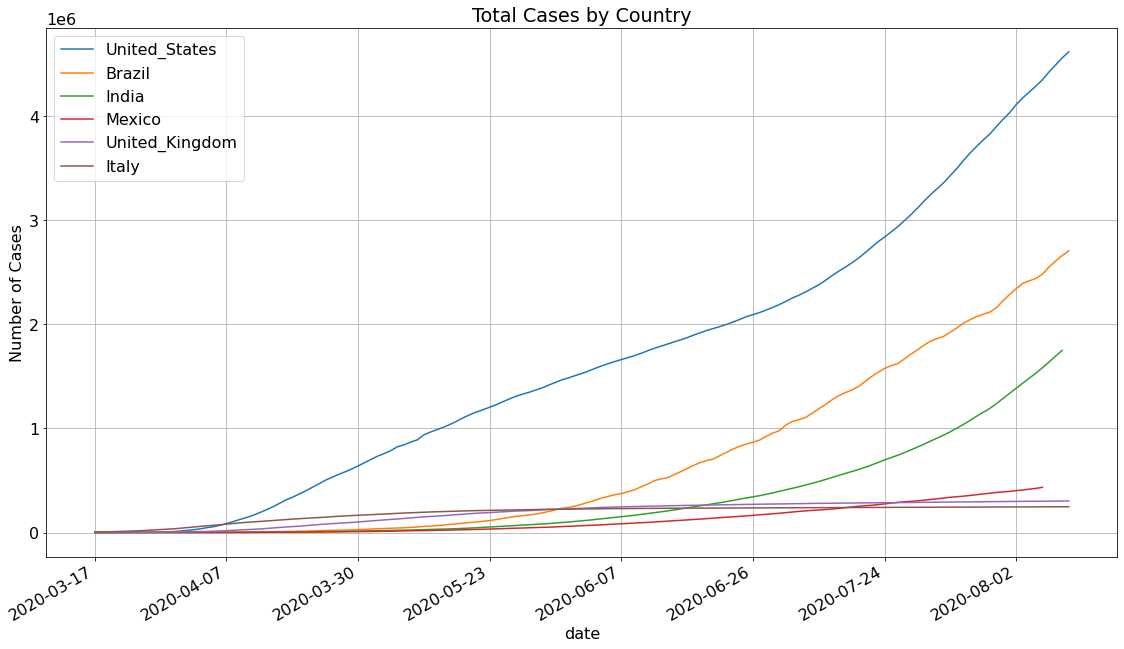

In [20]:
dfTotalCases.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Total Cases by Country')

ax = plt.gca()
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

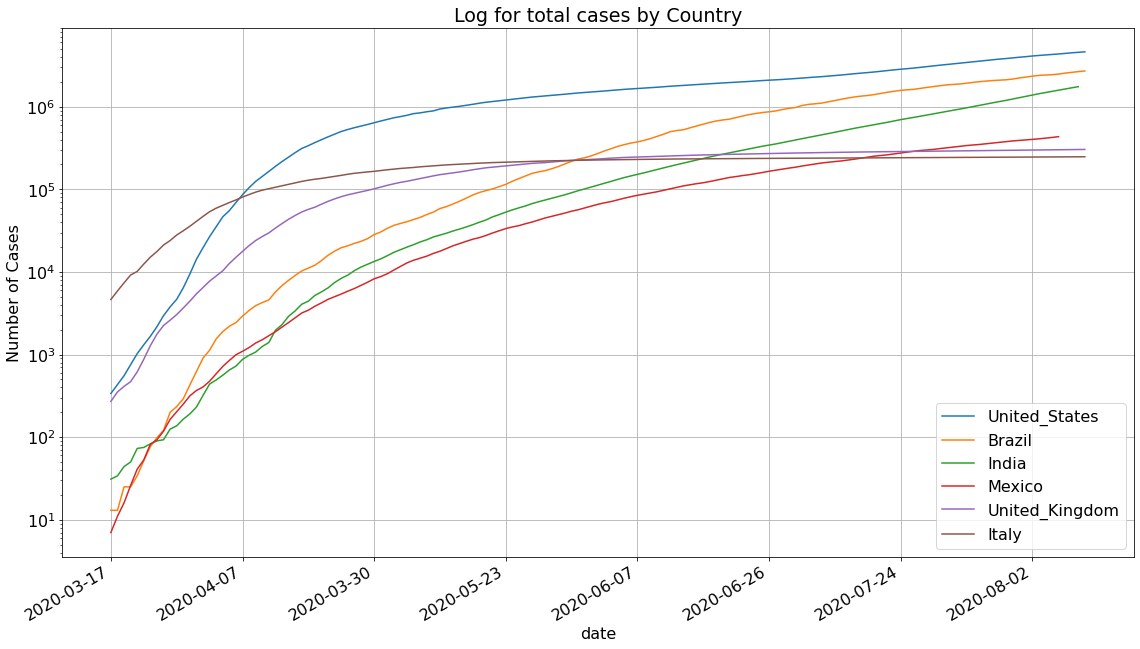

In [21]:
dfTotalCases.plot(x='date', y=dfCountry, logx=False, logy=True, figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Log for total cases by Country')

ax = plt.gca()
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### Total Deaths per Country

In [22]:
dfTotalDeaths.sort_values(by=['date'], ascending=False)

date  United_States     Brazil      India     Mexico  \
140  2020-08-02    145546.0000 85238.0000 32063.0000 44876.0000   
138  2020-08-01    143190.0000 82771.0000 30601.0000 43680.0000   
137  2020-07-31    142066.0000 81487.0000 29861.0000 43374.0000   
136  2020-07-30    140906.0000 80120.0000 28732.0000 42645.0000   
114  2020-07-29    125804.0000 57622.0000 16893.0000 29189.0000   
..          ...            ...        ...        ...        ...   
12   2020-03-11       150.0000     4.0000     4.0000     2.0000   
48   2020-03-10     49963.0000  3313.0000   775.0000  1434.0000   
64   2020-03-09     78794.0000 10627.0000  2206.0000  4220.0000   
4    2020-03-08        28.0000     0.0000     0.0000     0.0000   
10   2020-03-07        85.0000     0.0000     3.0000     2.0000   

     United_Kingdom      Italy  
140      45677.0000 35097.0000  
138      45501.0000 35082.0000  
137      45422.0000 35073.0000  
136      45312.0000 35058.0000  
114      43550.0000 34738.0000  
..              ...        ...  
12         115.0000  2978.0000  
48       21801.0000 25549.0000  
64       31611.0000 30395.0000  
4            7.0000   631.0000  
10          65.0000  2158.0000  

[149 rows x 7 columns]

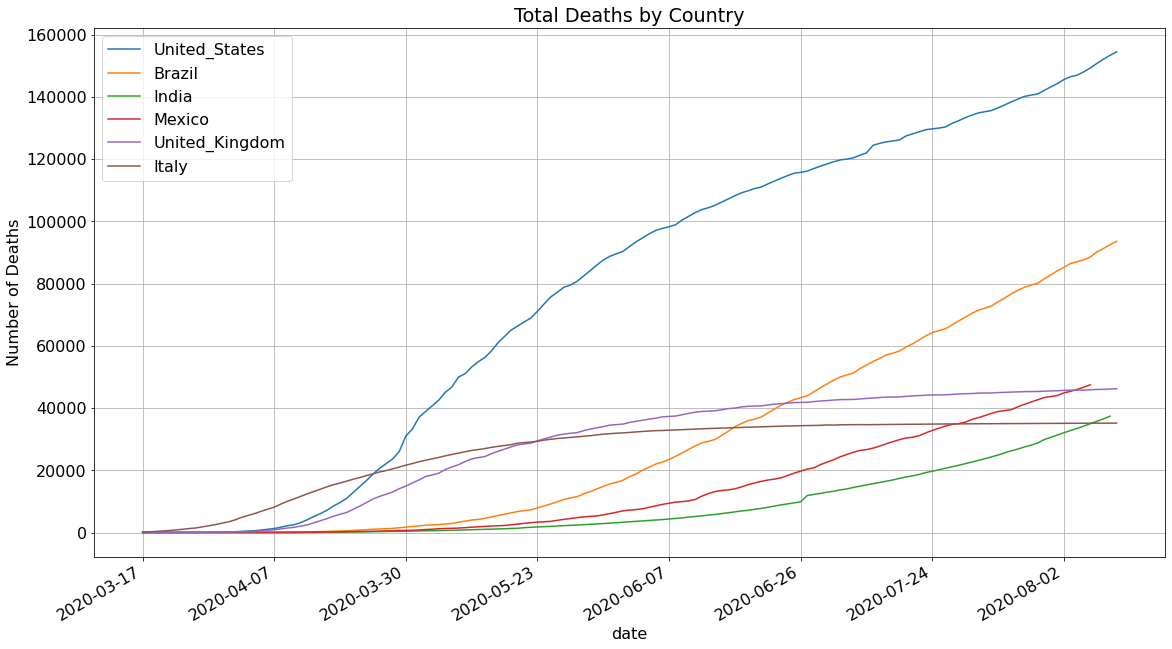

In [23]:
dfTotalDeaths.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Number of Deaths')
plt.title('Total Deaths by Country')

ax = plt.gca()
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

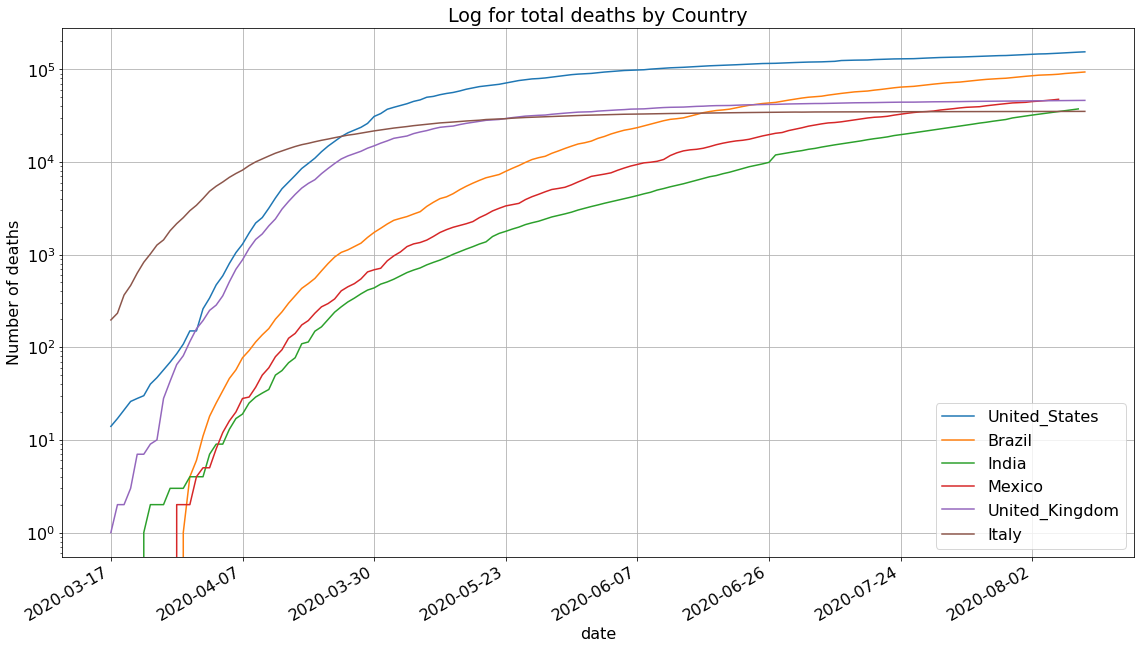

In [24]:
dfTotalDeaths.plot(x='date', y=dfCountry, logx=False, logy=True, figsize=(19.20,10.80))

plt.ylabel('Number of deaths')
plt.title('Log for total deaths by Country')

ax = plt.gca()
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### New daily cases

In [25]:
dfNewCases.sort_values(by=['date'], ascending=False)

date  United_States     Brazil      India    Mexico  \
140  2020-08-02     78427.0000 55891.0000 48661.0000 7208.0000   
138  2020-08-01     68848.0000 67860.0000 49310.0000 5480.0000   
137  2020-07-31     72048.0000 41008.0000 45720.0000 6751.0000   
136  2020-07-30     56750.0000 20257.0000 37724.0000 7573.0000   
114  2020-07-29     38673.0000 30476.0000 18522.0000 6741.0000   
..          ...            ...        ...        ...       ...   
12   2020-03-11      2988.0000   137.0000    26.0000   65.0000   
48   2020-03-10     26543.0000  3735.0000  1429.0000  852.0000   
64   2020-03-09     25612.0000 10611.0000  4213.0000 1862.0000   
4    2020-03-08       271.0000     9.0000    23.0000   15.0000   
10   2020-03-07       887.0000    34.0000    12.0000   39.0000   

     United_Kingdom     Italy  
140        731.0000  252.0000  
138        751.0000  280.0000  
137        793.0000  128.0000  
136        413.0000  190.0000  
114        649.0000  174.0000  
..              ...       ...  
12         769.0000 4207.0000  
48        5487.0000 2646.0000  
64        3063.0000 1083.0000  
4          148.0000  977.0000  
10         442.0000 4000.0000  

[149 rows x 7 columns]

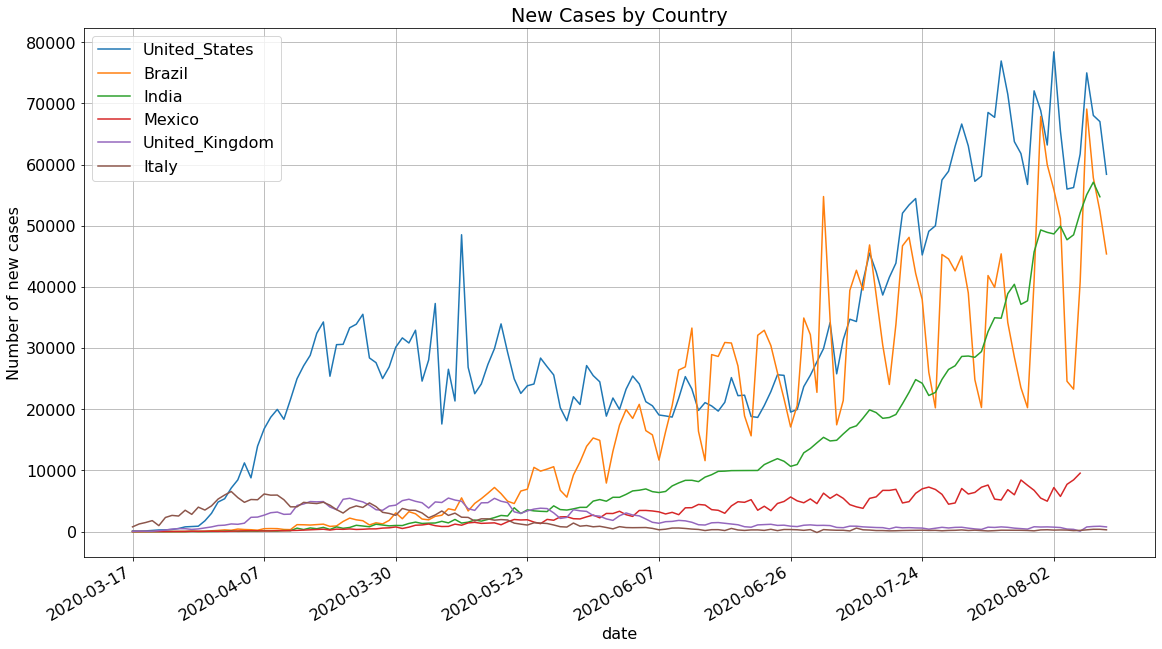

In [26]:
dfNewCases.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Number of new cases')
plt.title('New Cases by Country')

ax = plt.gca()
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### New daily deaths

In [27]:
dfNewDeaths.sort_values(by=['date'], ascending=False)

date  United_States    Brazil     India   Mexico  United_Kingdom  \
140  2020-08-02      1304.0000 1156.0000  705.0000 854.0000        123.0000   
138  2020-08-01      1124.0000 1284.0000  740.0000 306.0000         79.0000   
137  2020-07-31      1160.0000 1367.0000 1129.0000 729.0000        110.0000   
136  2020-07-30       372.0000  632.0000  648.0000 737.0000         12.0000   
114  2020-07-29       265.0000  552.0000  418.0000 679.0000         36.0000   
..          ...            ...       ...       ...      ...             ...   
12   2020-03-11        42.0000    3.0000    1.0000   0.0000         34.0000   
48   2020-03-10      3179.0000  407.0000   57.0000  83.0000        727.0000   
64   2020-03-09      1614.0000  730.0000   97.0000 294.0000        346.0000   
4    2020-03-08         2.0000    0.0000    0.0000   0.0000          4.0000   
10   2020-03-07        16.0000    0.0000    0.0000   2.0000         22.0000   

       Italy  
140   5.0000  
138   9.0000  
137  15.0000  
136  13.0000  
114  22.0000  
..       ...  
12  473.0000  
48  464.0000  
64  194.0000  
4   167.0000  
10  347.0000  

[149 rows x 7 columns]

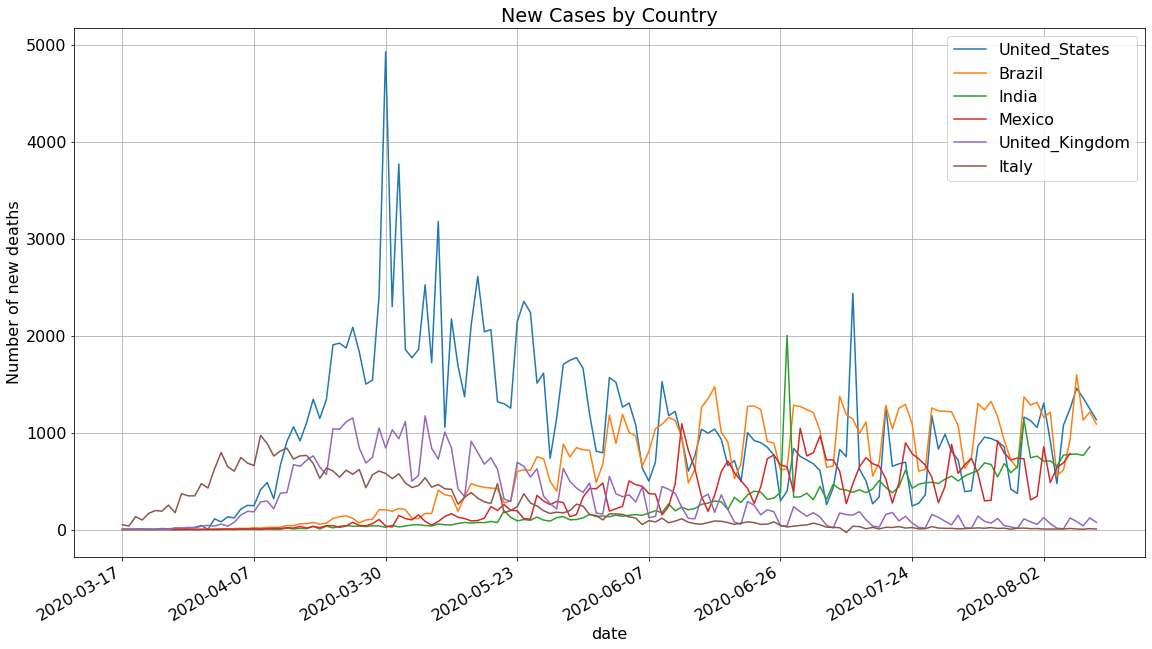

In [28]:
dfNewDeaths.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Number of new deaths')
plt.title('New Cases by Country')

ax = plt.gca()
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### Total cases and deaths by country

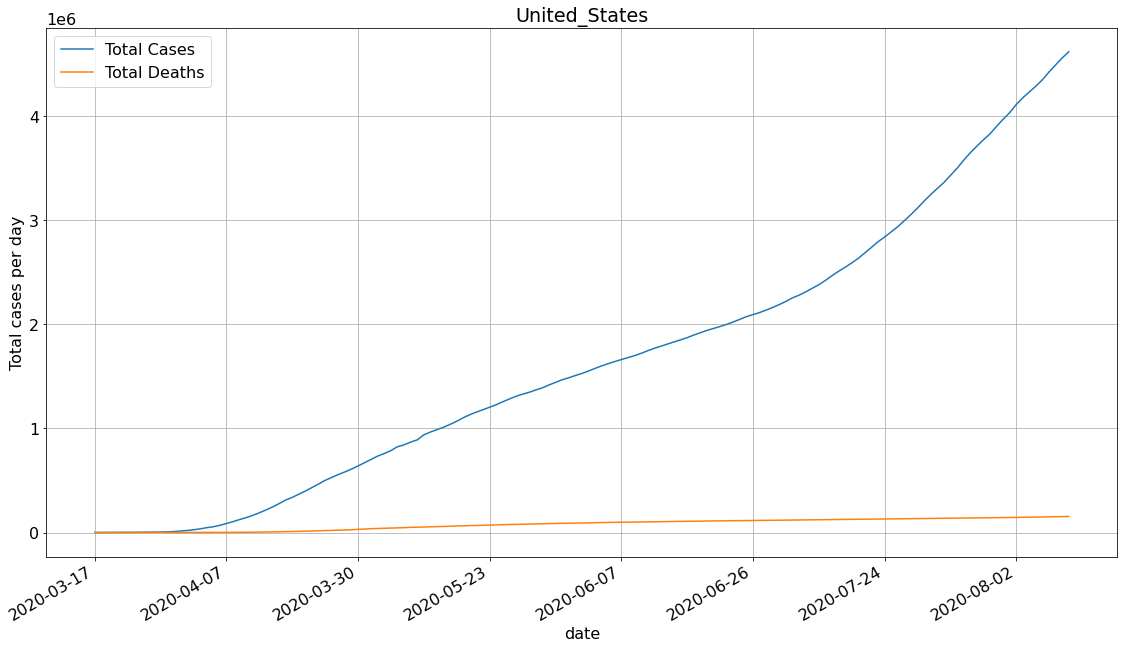

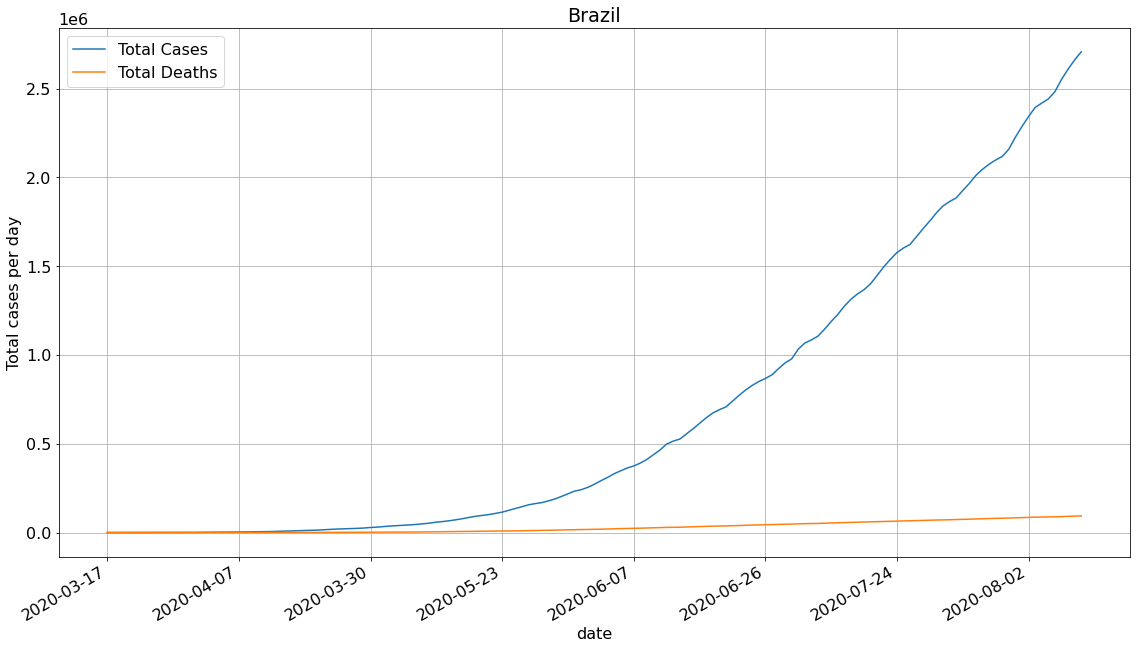

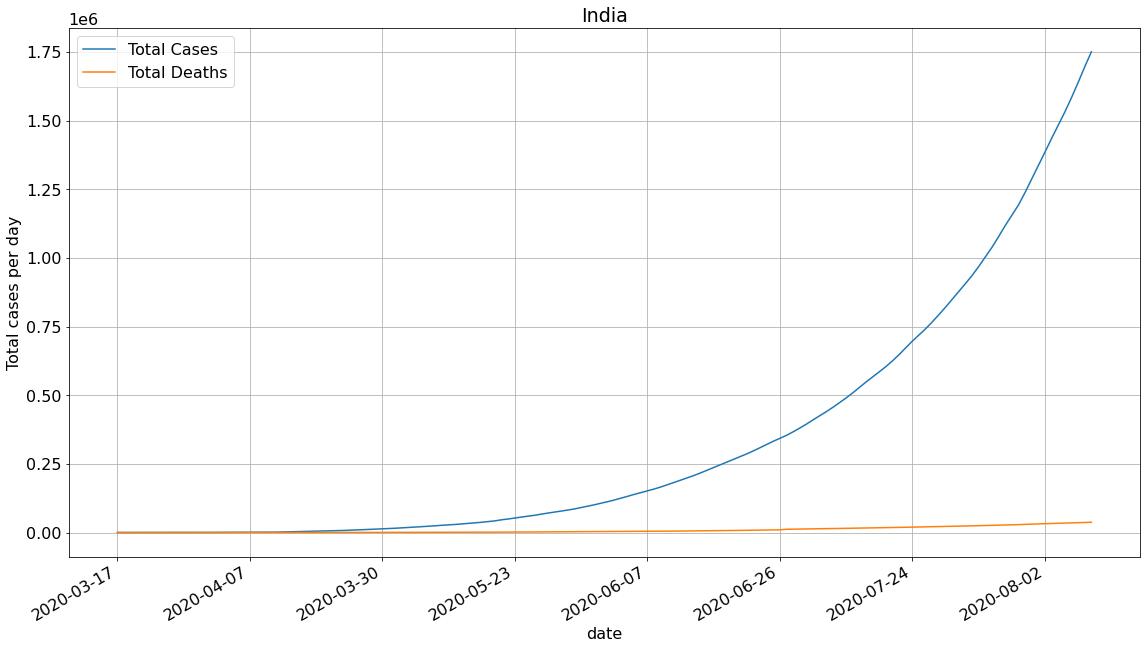

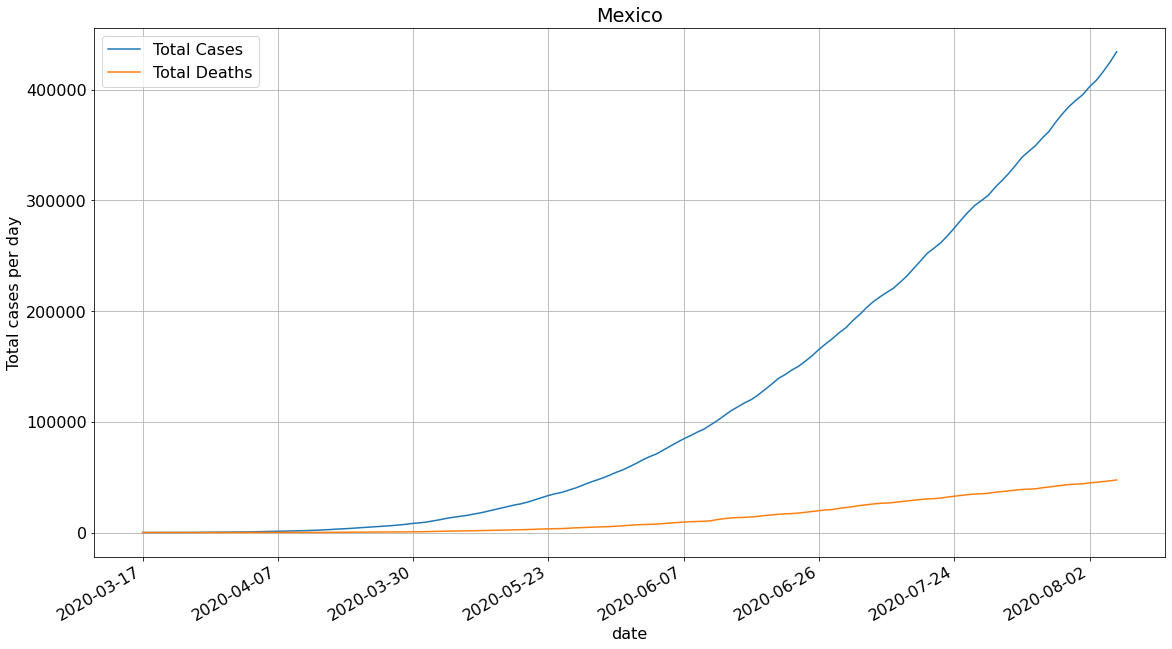

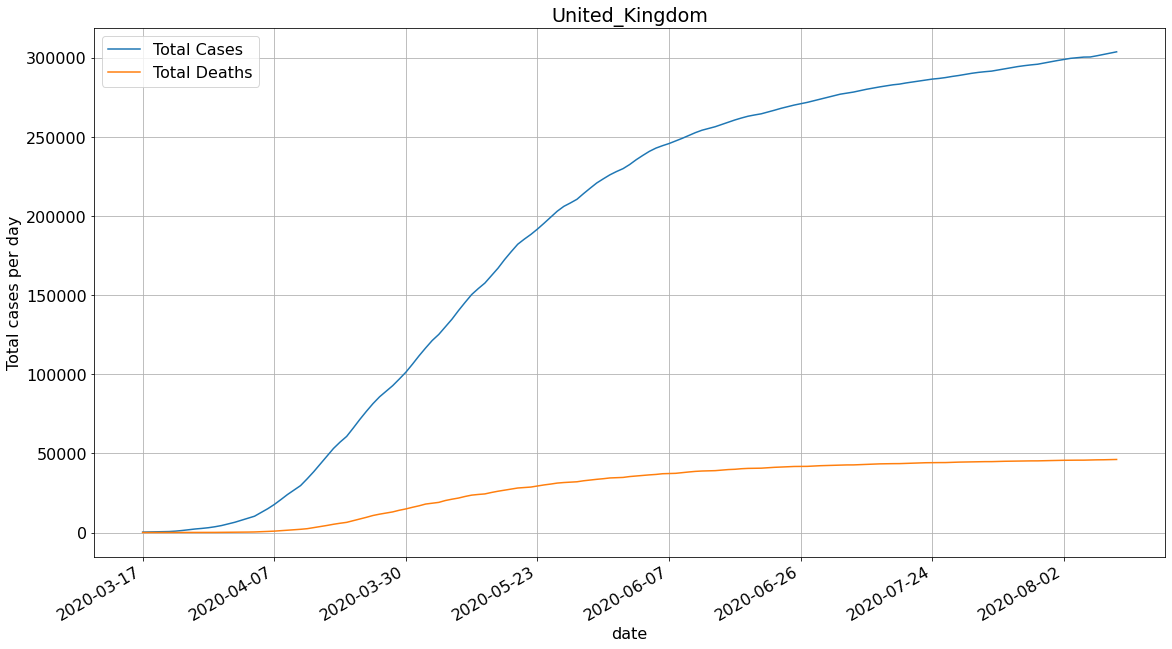

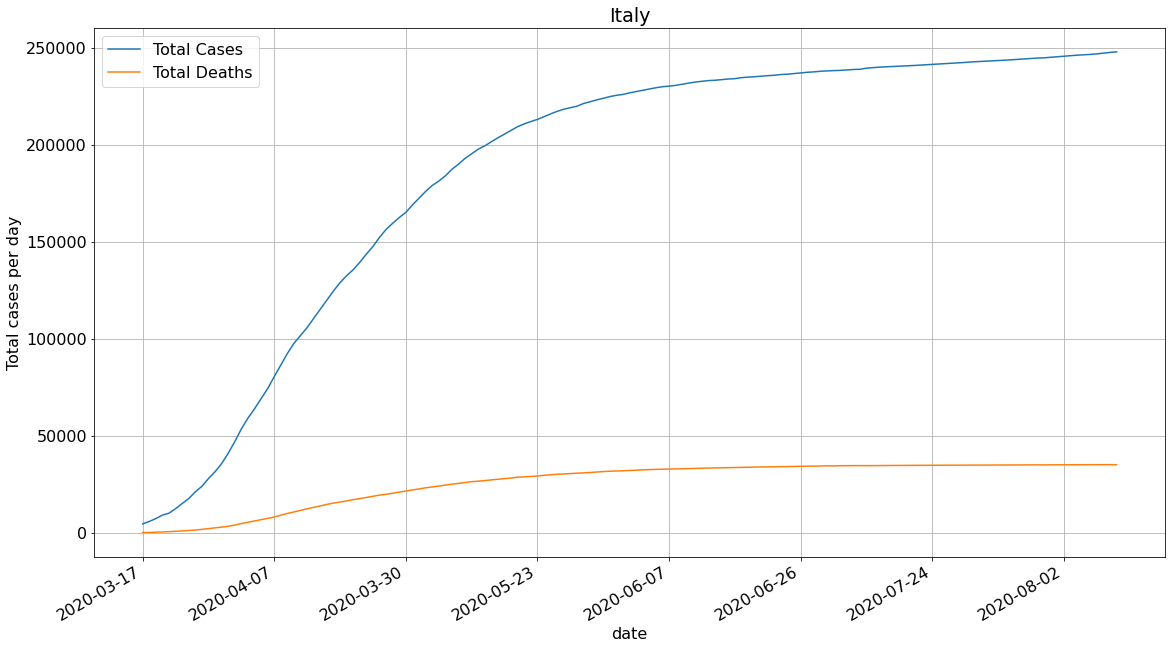

In [29]:
for index in range(len(dfCountry)):
    ax = dfTotalCases.plot(x='date', y=[dfCountry[index]], figsize=(19.20,10.80))
    dfTotalDeaths.plot(ax=ax, x='date', y=[dfCountry[index]])
    
    plt.ylabel('Total cases per day')
    ax.legend(["Total Cases", "Total Deaths"]);
    plt.title(dfCountry[index])
    
    ax = plt.gca()
    plt.gcf().autofmt_xdate()
    plt.grid()

### Daily cases and deaths by country

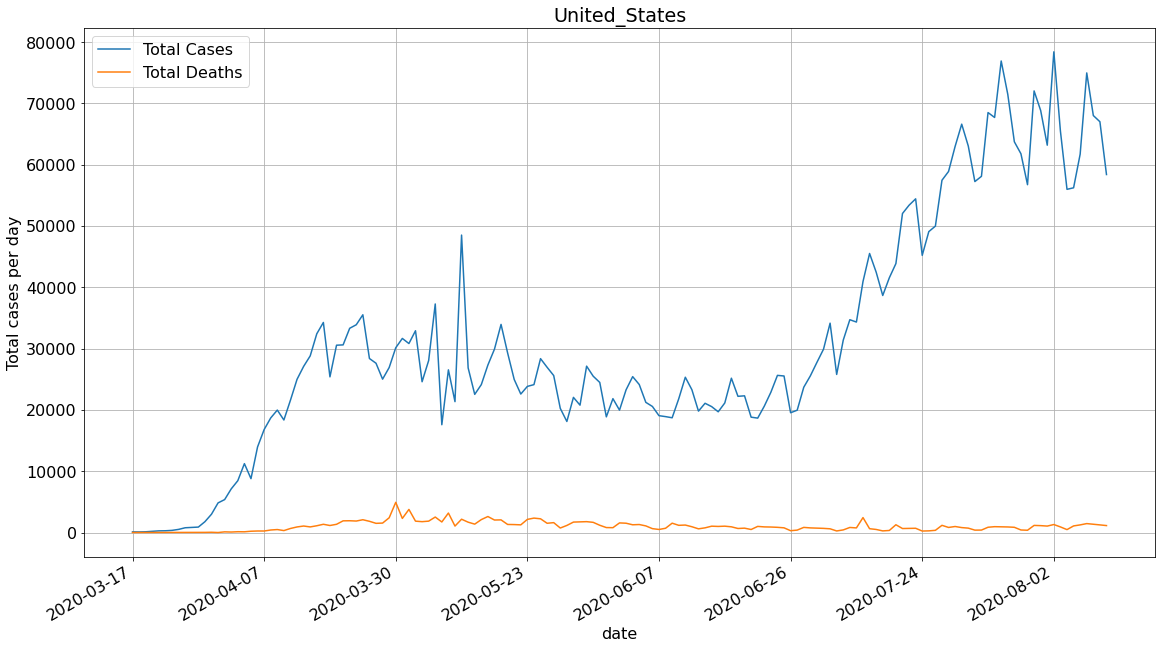

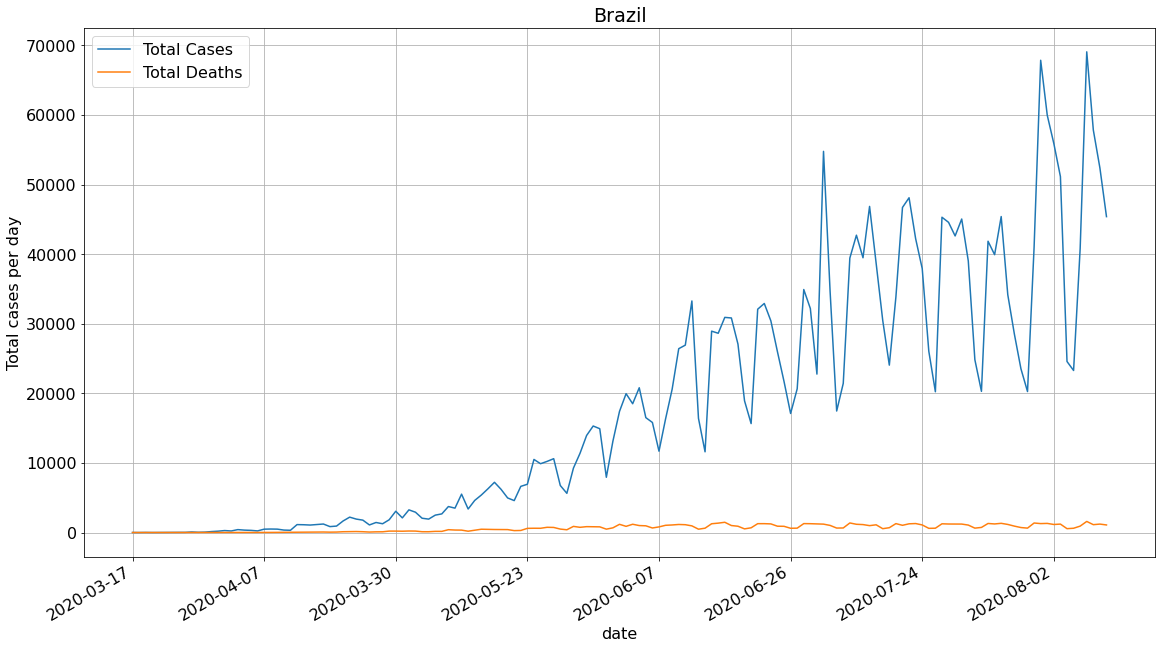

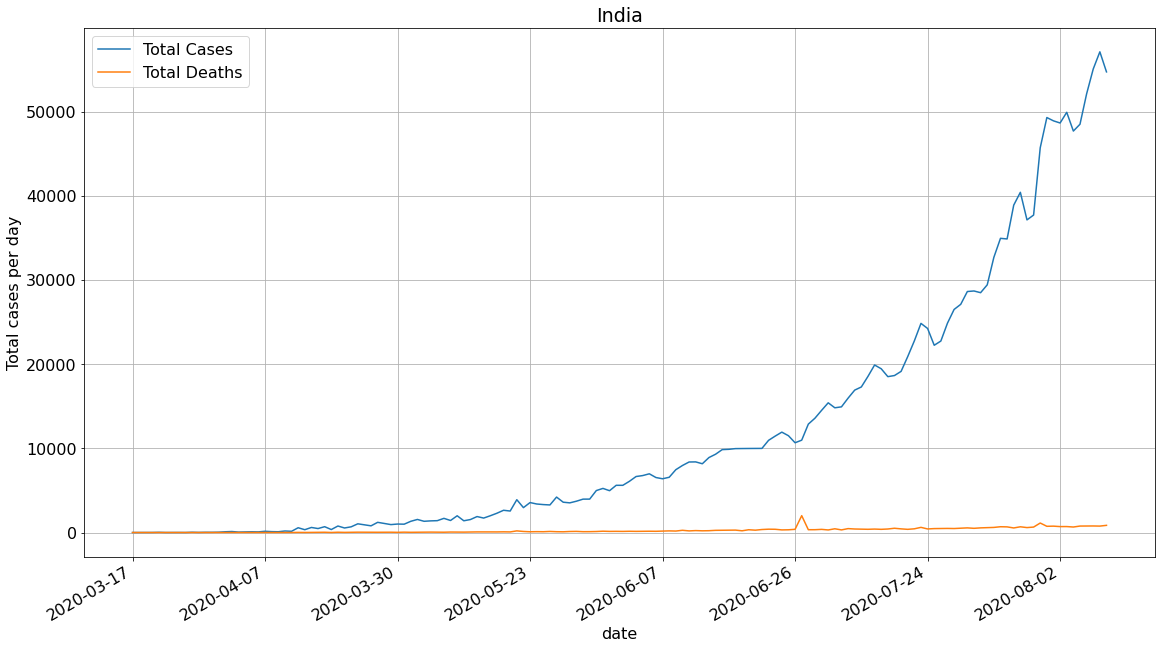

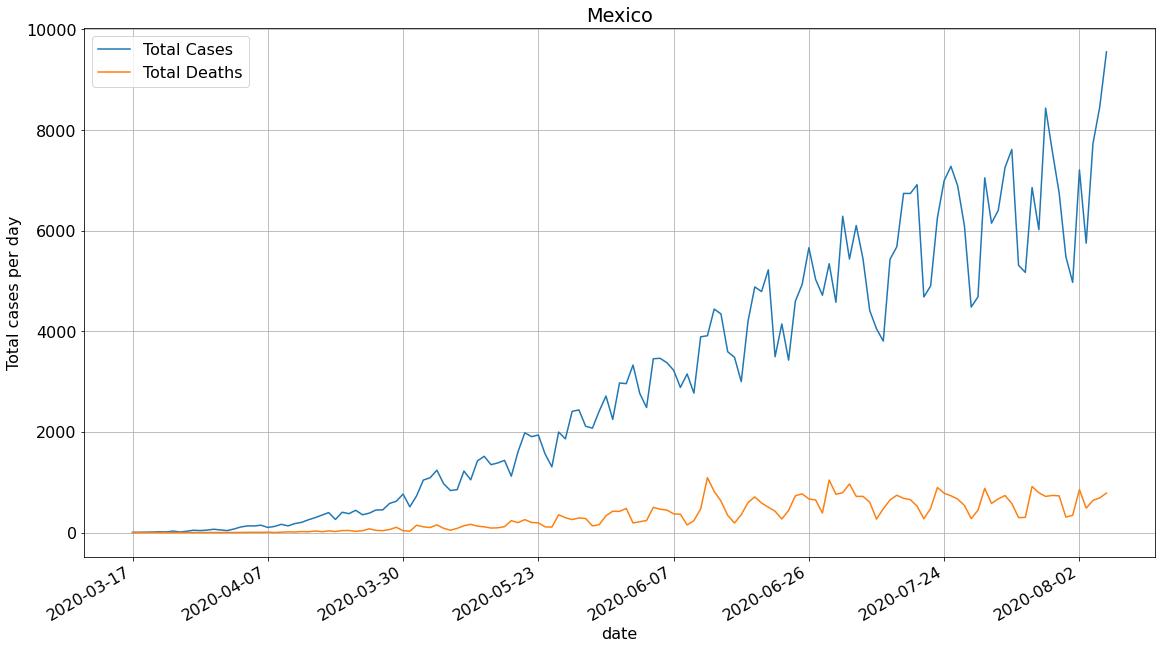

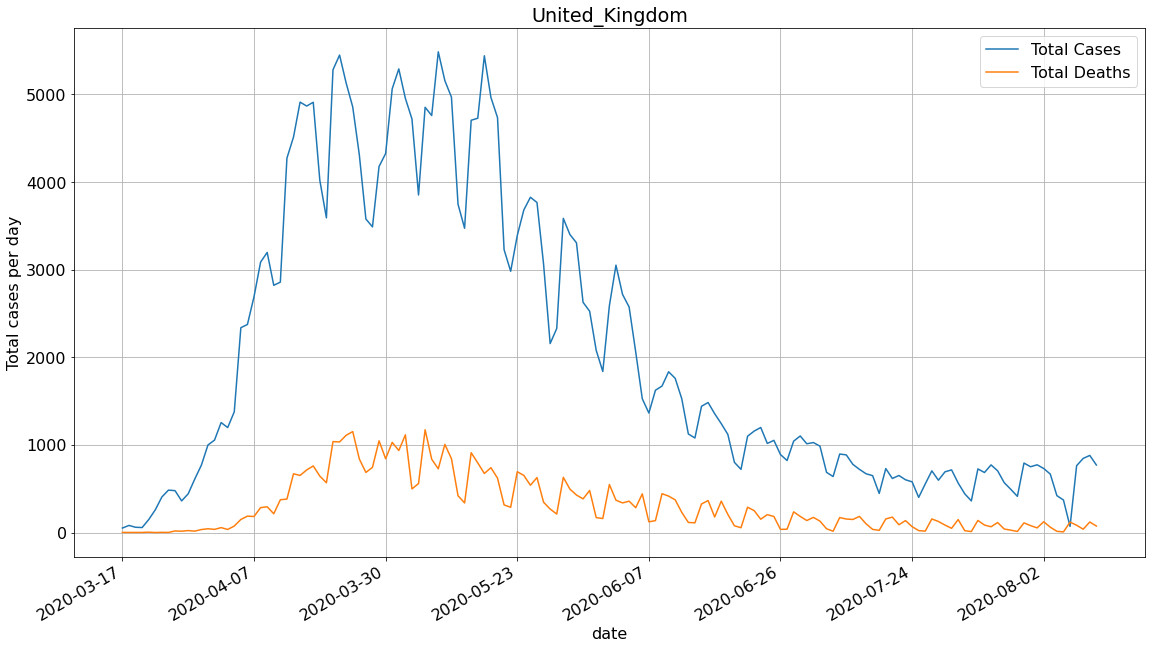

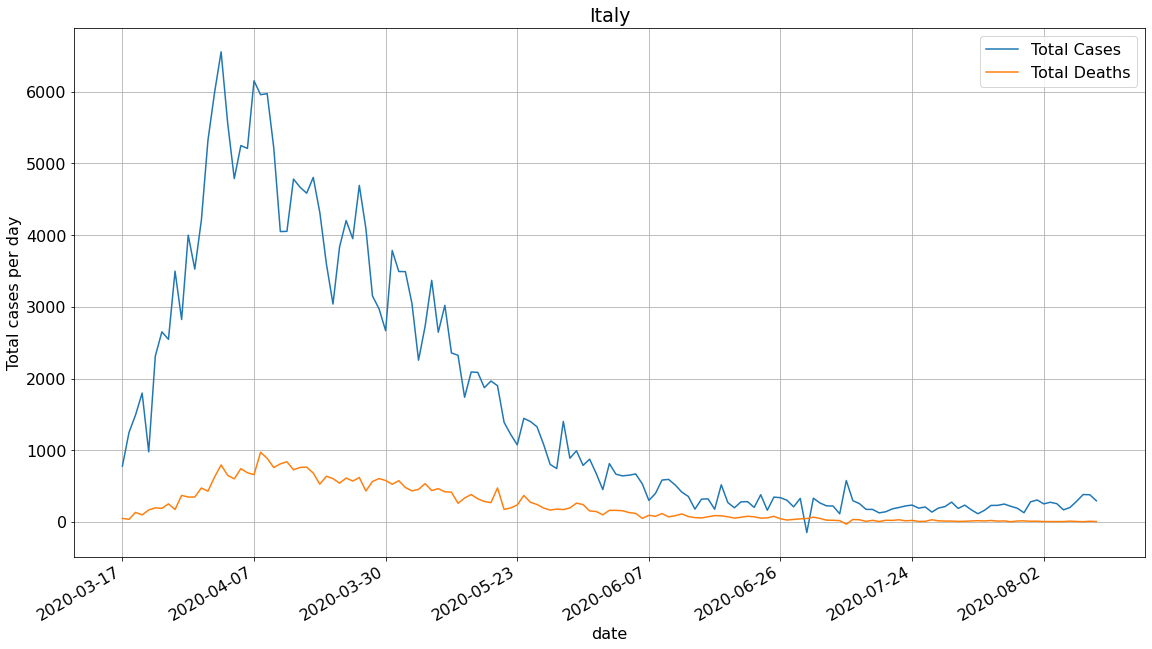

In [30]:
for index in range(len(dfCountry)):
    ax = dfNewCases.plot(x='date', y=[dfCountry[index]], figsize=(19.20,10.80))
    dfNewDeaths.plot(ax=ax, x='date', y=[dfCountry[index]])
    
    plt.ylabel('Total cases per day')
    ax.legend(["Total Cases", "Total Deaths"]);
    plt.title(dfCountry[index])
    
    ax = plt.gca()
    plt.gcf().autofmt_xdate()
    plt.grid()

### Brazil Cases

In [31]:
dfBrazil = df[df['location'] == 'Brazil']
dfBrazil = dfBrazil.sort_values(by='date', ascending=True)
dfBrazil.reset_index(drop=True, inplace=True)
dfBrazil

date location  total_cases  total_deaths  new_cases  new_deaths
0   2020-03-07   Brazil      13.0000        0.0000     5.0000      0.0000
1   2020-03-08   Brazil      13.0000        0.0000     0.0000      0.0000
2   2020-03-09   Brazil      25.0000        0.0000    12.0000      0.0000
3   2020-03-10   Brazil      25.0000        0.0000     0.0000      0.0000
4   2020-03-11   Brazil      34.0000        0.0000     9.0000      0.0000
..         ...      ...          ...           ...        ...         ...
144 2020-07-29   Brazil 2483191.0000    88539.0000 40816.0000    921.0000
145 2020-07-30   Brazil 2552265.0000    90134.0000 69074.0000   1595.0000
146 2020-07-31   Brazil 2610102.0000    91263.0000 57837.0000   1129.0000
147 2020-08-01   Brazil 2662485.0000    92475.0000 52383.0000   1212.0000
148 2020-08-02   Brazil 2707877.0000    93563.0000 45392.0000   1088.0000

[149 rows x 6 columns]

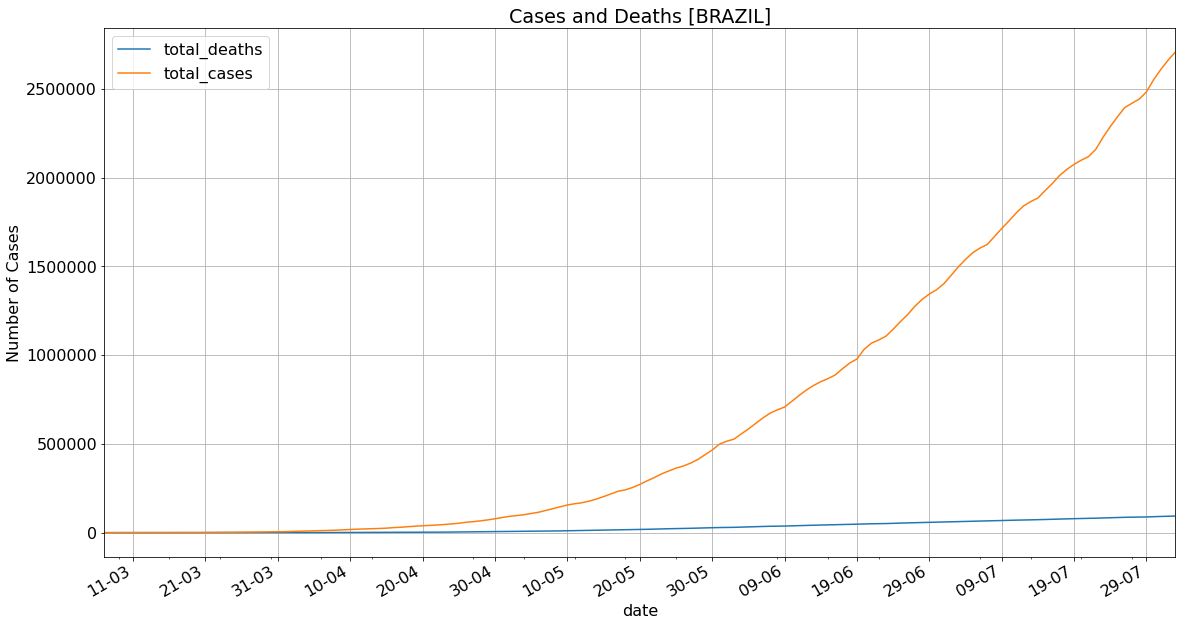

In [32]:
dfBrazil.plot(x='date', y=['total_deaths','total_cases'], figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Cases and Deaths [BRAZIL]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

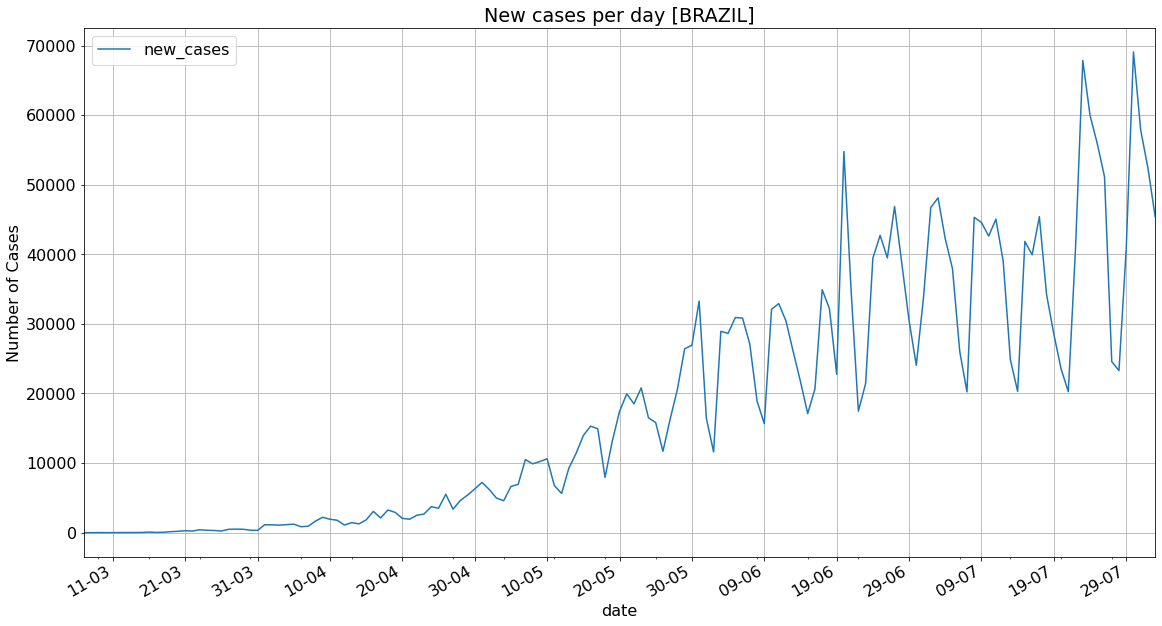

In [33]:
dfBrazil.plot(x='date', y='new_cases', figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('New cases per day [BRAZIL]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

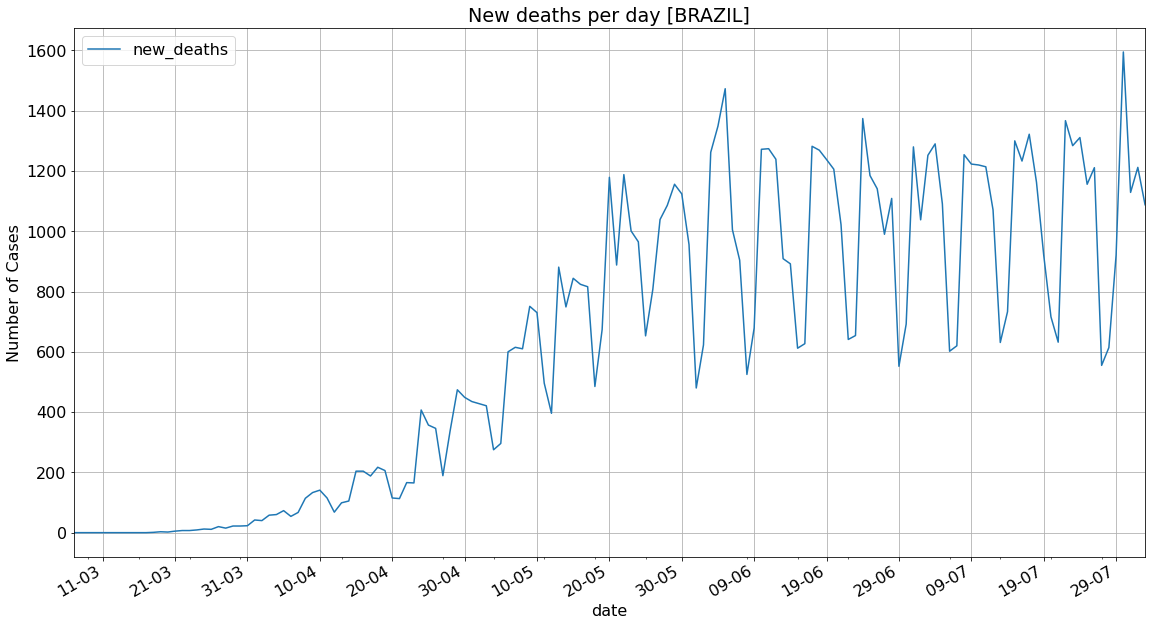

In [34]:
dfBrazil.plot(x='date', y='new_deaths', figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('New deaths per day [BRAZIL]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

In [35]:
dfDiff = dfBrazil.loc[:,['date','new_deaths']]
dfDiff['prev_cases'] = dfDiff['new_deaths'].shift(1)
dfDiff = dfDiff.dropna()
dfDiff['diff'] = (dfDiff['new_deaths'] - dfDiff['prev_cases'])

dfDiff['date'] = pd.to_datetime(dfDiff['date'])

dfDiff

date  new_deaths  prev_cases      diff
1   2020-03-08      0.0000      0.0000    0.0000
2   2020-03-09      0.0000      0.0000    0.0000
3   2020-03-10      0.0000      0.0000    0.0000
4   2020-03-11      0.0000      0.0000    0.0000
5   2020-03-12      0.0000      0.0000    0.0000
..         ...         ...         ...       ...
144 2020-07-29    921.0000    614.0000  307.0000
145 2020-07-30   1595.0000    921.0000  674.0000
146 2020-07-31   1129.0000   1595.0000 -466.0000
147 2020-08-01   1212.0000   1129.0000   83.0000
148 2020-08-02   1088.0000   1212.0000 -124.0000

[148 rows x 4 columns]

In [36]:
fig = go.Figure([go.Bar(x=dfDiff['date'], y=dfDiff['diff'])])

fig.update_layout(xaxis_tickformat = '%m-%d', title='Difference in deaths compared to the previous day')
fig.update_xaxes(nticks=25, tickangle=315)

fig.show()

## Forecast to new deaths in World

#### LSTM Network for Regression

#### Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [37]:
dfPredict = dfWorld.loc[:,['date','new_deaths']]
dfPredict = dfPredict[(dfWorld['new_deaths'] > 200)]
dfPredict = dfPredict.sort_values(by='date', ascending=True)
dfPredict['date'] = dfPredict['date'].dt.year.astype('str')+'-'+dfPredict['date'].dt.month.astype('str')+'-'+dfPredict['date'].dt.day.astype('str')
dfPredict.reset_index(drop=True, inplace=True)
dfPredict

date  new_deaths
0     2020-3-9    228.0000
1    2020-3-10    208.0000
2    2020-3-11    273.0000
3    2020-3-12    326.0000
4    2020-3-13    350.0000
..         ...         ...
142  2020-7-29   6260.0000
143  2020-7-30   6719.0000
144  2020-7-31   6431.0000
145   2020-8-1   6209.0000
146   2020-8-2   5779.0000

[147 rows x 2 columns]

In [38]:
dfDeaths = dfPredict.drop(['date'],axis=1)

In [39]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dfDeaths)

In [40]:
train_size = int(len(dataset)*0.75)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print(len(train), len(test))

110 37


In [41]:
def create_dataset(dataset, lookBack=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-lookBack-1):
        a = dataset[i:(i+lookBack),0]
        dataX.append(a)
        dataY.append(dataset[i+lookBack,0])
    return np.array(dataX), np.array(dataY)

In [42]:
lookBack = 1
trainX, trainY = create_dataset(train, lookBack)
testX, testY = create_dataset(test, lookBack)

In [43]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [44]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=((1, lookBack))))
model.add(keras.layers.Dense(1))
optAdam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [45]:
history = model.fit(trainX, trainY, epochs=50, batch_size=10, validation_split=0.01, verbose=1, shuffle=False)

Epoch 1/50
11/11 [==============================] - 2s 183ms/step - loss: 0.1943 - mse: 0.1943 - val_loss: 0.2039 - val_mse: 0.2039
Epoch 2/50
11/11 [==============================] - 0s 26ms/step - loss: 0.1449 - mse: 0.1449 - val_loss: 0.1500 - val_mse: 0.1500
Epoch 3/50
11/11 [==============================] - 0s 24ms/step - loss: 0.1034 - mse: 0.1034 - val_loss: 0.1033 - val_mse: 0.1033
Epoch 4/50
11/11 [==============================] - 0s 14ms/step - loss: 0.0698 - mse: 0.0698 - val_loss: 0.0649 - val_mse: 0.0649
Epoch 5/50
11/11 [==============================] - 0s 26ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0364 - val_mse: 0.0364
Epoch 6/50
11/11 [==============================] - 0s 23ms/step - loss: 0.0305 - mse: 0.0305 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 7/50
11/11 [==============================] - 0s 16ms/step - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 8/50
11/11 [==============================] - 0s 18ms/step - loss: 0.0224 - 

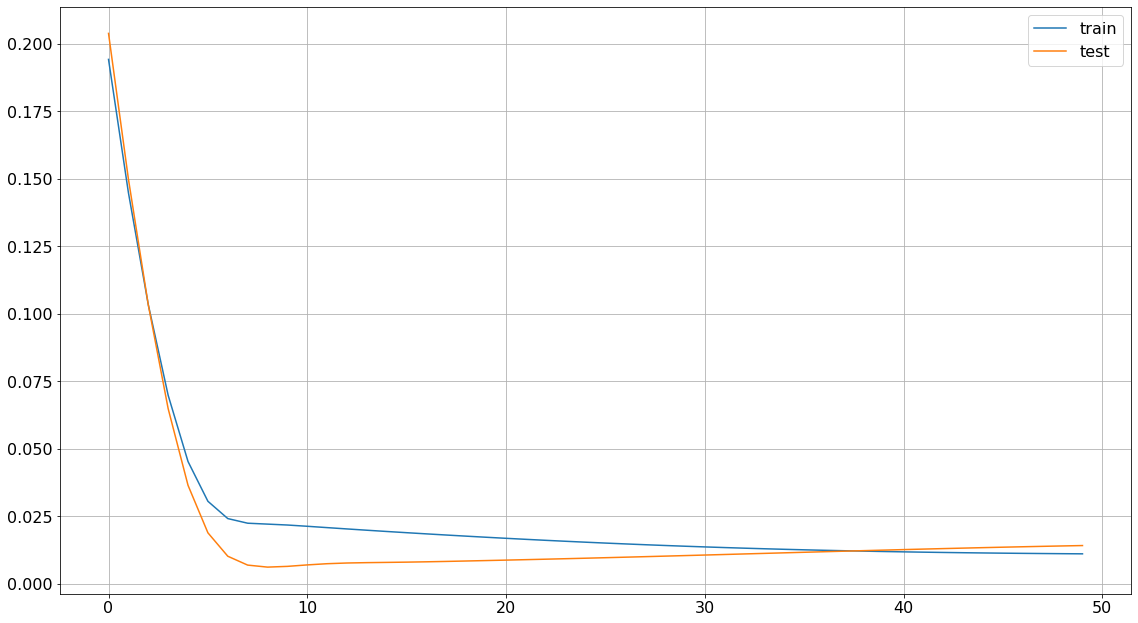

In [46]:
fig = plt.gcf()
fig.set_size_inches(19.20,10.80)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.grid()
plt.legend()

In [47]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [48]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [49]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1079.85 RMSE
Test Score: 1233.23 RMSE


In [50]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookBack:len(trainPredict)+lookBack, :] = trainPredict

In [51]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookBack*2)+1:len(dataset)-1, :] = testPredict

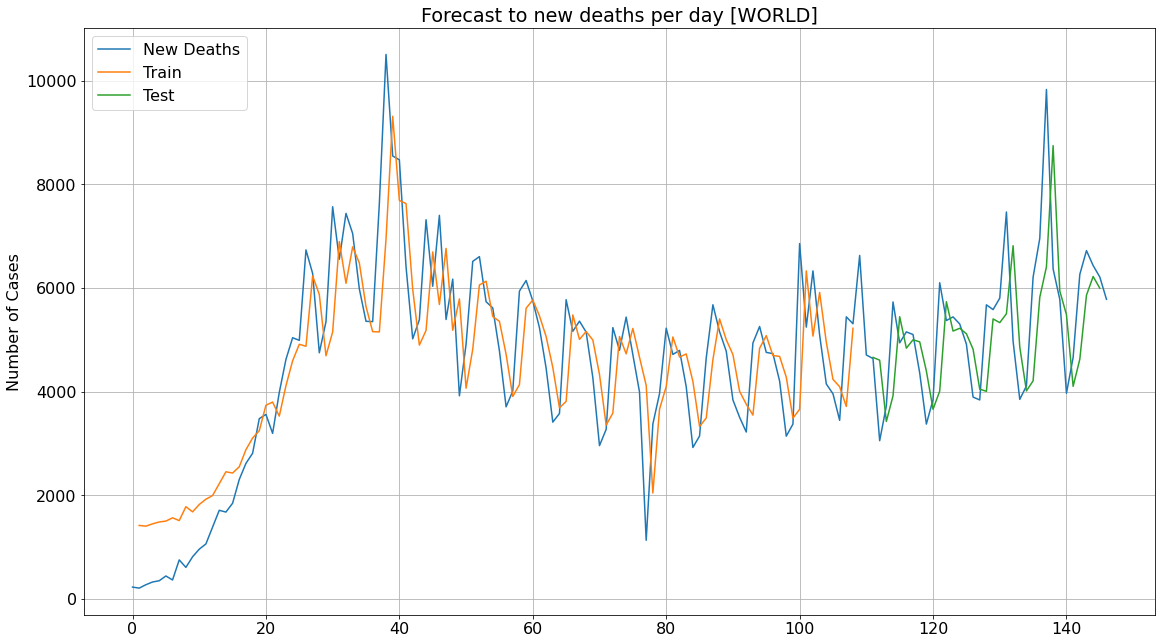

In [52]:
fig = plt.gcf()
fig.set_size_inches(19.20,10.80)

plt.ylabel('Number of Cases')
plt.title('Forecast to new deaths per day [WORLD]')

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.gca().legend(('New Deaths','Train','Test'))

plt.grid()
plt.show()

### Simple Linear Regression

#### Source: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

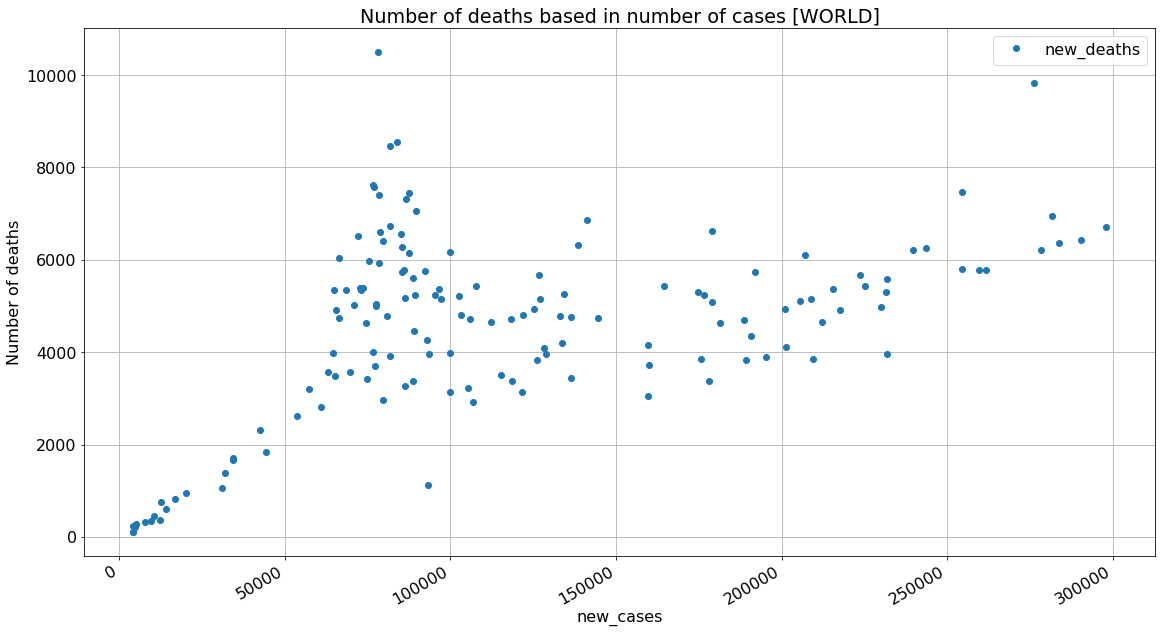

In [53]:
dfWorld.plot(x='new_cases', y='new_deaths', style='o', figsize=(19.20,10.80))

plt.ylabel('Number of deaths')
plt.title('Number of deaths based in number of cases [WORLD]')

ax = plt.gca()
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

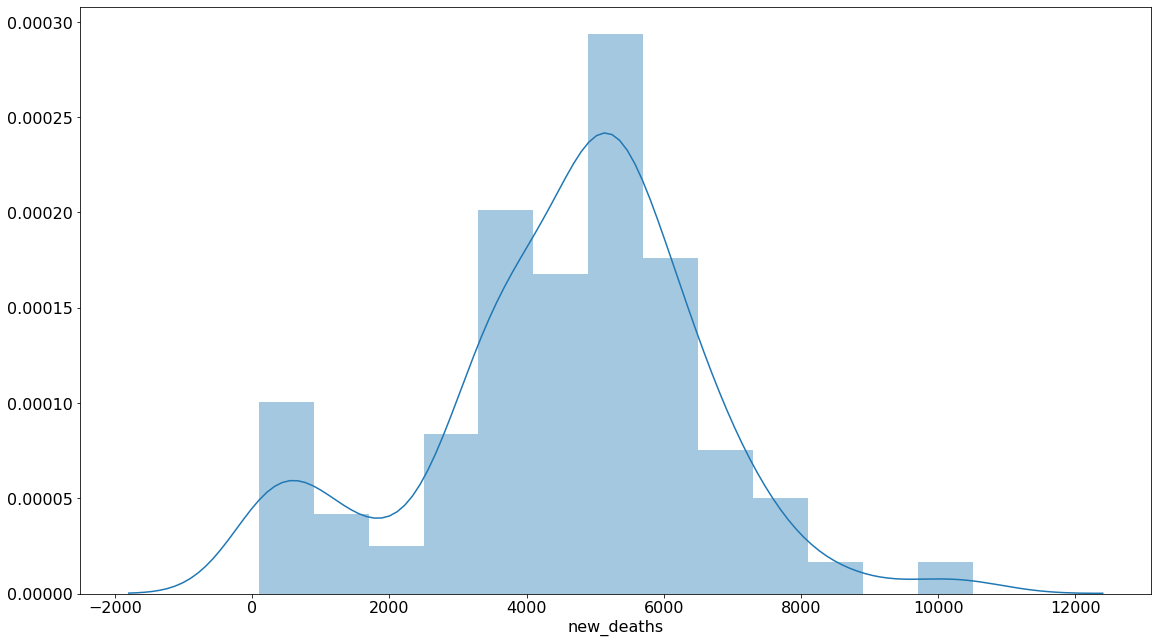

In [54]:
plt.figure(figsize=(19.20,10.80))
plt.tight_layout()
seabornInstance.distplot(dfWorld['new_deaths'])

In [55]:
X = dfWorld['new_deaths'].values.reshape(-1,1)
y = dfWorld['new_cases'].values.reshape(-1,1)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) 

In [57]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [58]:
print(regressor.intercept_)

[41520.76085872]


In [59]:
print(regressor.coef_)

[[16.8028577]]


In [60]:
y_pred = regressor.predict(X_test)

In [61]:
dfLinear = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfLinear

Actual   Predicted
0  254548.0000 166937.2907
1  164486.0000 132945.1096
2   76463.0000 108917.0231
3   88734.0000  98213.6027
4   10416.0000  48947.6240
..         ...         ...
55 231656.0000 130626.3153
56  78518.0000 141296.1299
57  66330.0000 121300.7292
58  89153.0000 129416.5095
59 133098.0000 121821.6178

[60 rows x 2 columns]

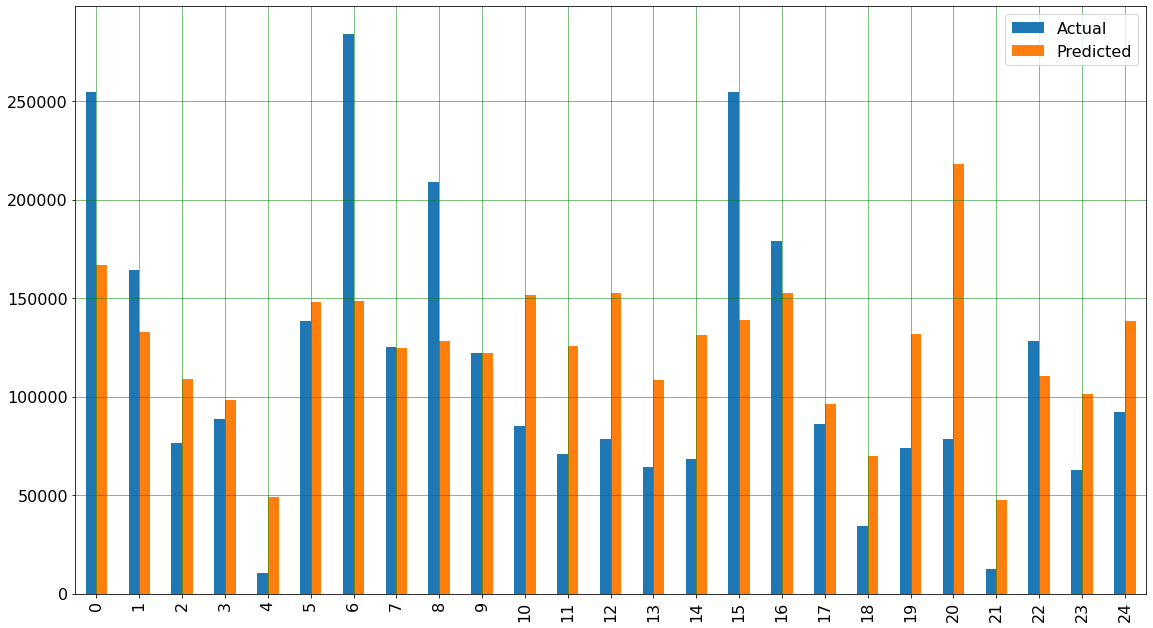

In [62]:
dfLinear = dfLinear.head(25)
dfLinear.plot(kind='bar',figsize=(19.20,10.80))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

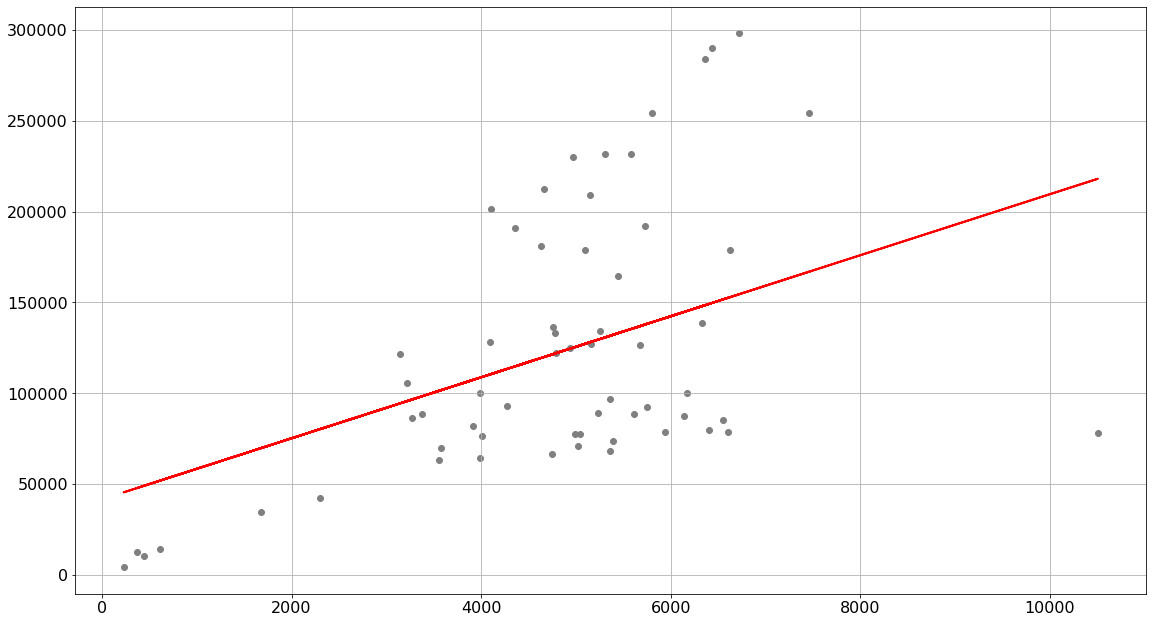

In [63]:
plt.figure(figsize=(19.20,10.80))
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.grid()
plt.show()

In [64]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 50942.70857065332
Mean Squared Error: 3941543026.66879
Root Mean Squared Error: 3941543026.66879


### Polynomial Regression

#### Source: https://towardsdatascience.com/understanding-regression-using-covid-19-dataset-detailed-analysis-be7e319e3a50

In [65]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin = LinearRegression()
lin.fit(X_poly, y)
pred = lin.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred)))

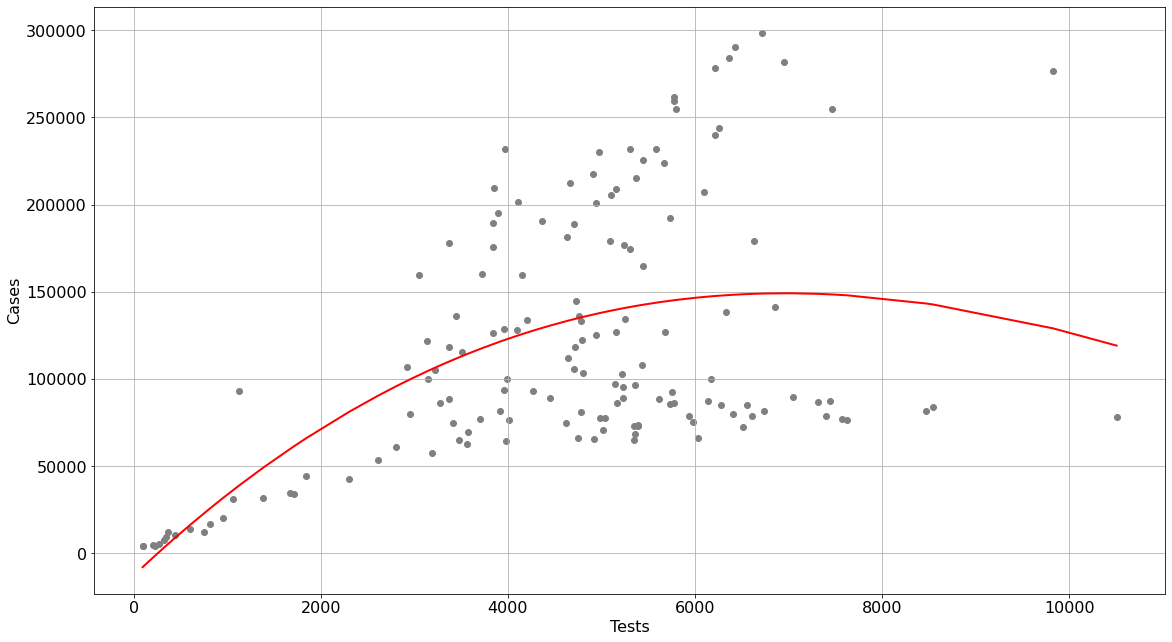

In [66]:
plt.figure(figsize=(19.20,10.80))
plt.scatter(X, y, color='gray')
plt.plot(new_X, new_y, color='red', linewidth=2)
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.grid()
plt.show()

In [9]:
# dfWorld.plot(x='date', y=['total_cases', 'total_deaths'], figsize=(19.20,10.80))

# plt.ylabel('Number of Cases')
# plt.title('Total cases and deaths [WORLD]')

# ax = plt.gca()
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
# plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
# plt.gcf().autofmt_xdate()

# plt.grid()
# plt.show()